In [2]:
import pandas as pd
import numpy as np
import sys, os
from IPython.display import display
import matplotlib.pyplot as plt
import pvlib

In [3]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
lat, lon, year = 33.2164, -97.1292, 2010
# You must request an NSRDB api key from the link above
api_key = 'CpLeHgGtuZ7q2InYhqann9FdVhHvzwspvKHbHn1c'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle'
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Pranshu+Bansal'
# Your reason for using the NSRDB.
reason_for_use = 'Test+run'
# Your affiliation
your_affiliation = 'UC+Berkeley'
# Your email address
your_email = 'pranshu@berkeley.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'true'

# Declare url string
url = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']




In [4]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,693763,-,-,-,33.21,-97.14,-6,203,-6,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,v3.0.1


In [5]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
df.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,2.9,-2,167.60
2010-01-01 00:30:00,2010,1,1,0,30,0,0,0,2.7,-2,169.78
2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,2.5,-3,168.08
2010-01-01 01:30:00,2010,1,1,1,30,0,0,0,2.4,-3,163.67
2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,2.4,-4,158.14


In [6]:
# take a look
print('shape:',df.shape)

# Print column names
print(df.columns.values)

shape: (17520, 11)
['Year' 'Month' 'Day' 'Hour' 'Minute' 'GHI' 'DHI' 'DNI' 'Wind Speed'
 'Temperature' 'Solar Zenith Angle']


In [7]:
# DOESN'T WORK


# #import additional module for SAM simulation:
# import site
# # Use site.addsitedir() to set the path to the SAM SDK API. Set path to the python directory.
# site.addsitedir('./sam-sdk-2017-9-5-r4/languages/python/')
# import sscapi
# ssc = sscapi.PySSC()

# # Resource inputs for SAM model:
# wfd = ssc.data_create()
# ssc.data_set_number(wfd, 'lat', lat)
# ssc.data_set_number(wfd, 'lon', lon)
# ssc.data_set_number(wfd, 'tz', timezone)
# ssc.data_set_number(wfd, 'elev', elevation)
# ssc.data_set_array(wfd, 'year', df.index.year)
# ssc.data_set_array(wfd, 'month', df.index.month)
# ssc.data_set_array(wfd, 'day', df.index.day)
# ssc.data_set_array(wfd, 'hour', df.index.hour)
# ssc.data_set_array(wfd, 'minute', df.index.minute)
# ssc.data_set_array(wfd, 'dn', df['DNI'])
# ssc.data_set_array(wfd, 'df', df['DHI'])
# ssc.data_set_array(wfd, 'wspd', df['Wind Speed'])
# ssc.data_set_array(wfd, 'tdry', df['Temperature'])

# # Create SAM compliant object  
# dat = ssc.data_create()
# ssc.data_set_table(dat, 'solar_resource_data', wfd)
# ssc.data_free(wfd)

# # Specify the system Configuration
# # Set system capacity in MW
# system_capacity = 4
# ssc.data_set_number(dat, 'system_capacity', system_capacity)
# # Set DC/AC ratio (or power ratio). See https://sam.nrel.gov/sites/default/files/content/virtual_conf_july_2013/07-sam-virtual-conference-2013-woodcock.pdf
# ssc.data_set_number(dat, 'dc_ac_ratio', 1.1)
# # Set tilt of system in degrees
# ssc.data_set_number(dat, 'tilt', 25)
# # Set azimuth angle (in degrees) from north (0 degrees)
# ssc.data_set_number(dat, 'azimuth', 180)
# # Set the inverter efficency
# ssc.data_set_number(dat, 'inv_eff', 96)
# # Set the system losses, in percent
# ssc.data_set_number(dat, 'losses', 14.0757)
# # Specify fixed tilt system (0=Fixed, 1=Fixed Roof, 2=1 Axis Tracker, 3=Backtracted, 4=2 Axis Tracker)
# ssc.data_set_number(dat, 'array_type', 0)
# # Set ground coverage ratio
# ssc.data_set_number(dat, 'gcr', 0.4)
# # Set constant loss adjustment
# ssc.data_set_number(dat, 'adjust:constant', 0)

# # execute and put generation results back into dataframe
# mod = ssc.module_create('pvwattsv5')
# ssc.module_exec(mod, dat)
# df['generation'] = np.array(ssc.data_get_array(dat, 'gen'))

# # free the memory
# ssc.data_free(dat)
# ssc.module_free(mod)

In [8]:
naive_times = pd.DatetimeIndex(start='2014', end='2015', freq='1h')
coordinates = [(25.17, -111.74, 'Comondú',50.0, 'Etc/GMT+7'),
               (29.73, -111.06, 'Carbó', 594.0, 'Etc/GMT+7'),
               (20.53, -103.62, 'Tala', 1484.0, 'Etc/GMT+6'),
               (26.05, -103.26, 'Francisco', 1098.0, 'Etc/GMT+6'),
               (23.05, -100.26, 'Guadalcázar', 1447.0, 'Etc/GMT+6'),
               (25.61, -100.22, 'Nuevo Leon', 718.0, 'Etc/GMT+6'),
               (19.29, -99.10, 'Lago', 2235.0, 'Etc/GMT+6'),
               (18.17, -98.10, 'San', 1186.0, 'Etc/GMT+6'),
               (16.45, -92.82, 'Acala', 571.0, 'Etc/GMT+6'),
               (20.89, -89.46, 'Acanceh', 16.0, 'Etc/GMT+6')]

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']
temp_air = 20
wind_speed = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


In [9]:
system = {'module': module, 'inverter': inverter,'surface_azimuth': 180}
energies = {}
for latitude, longitude, name, altitude, timezone in coordinates:
    times = naive_times.tz_localize(timezone)
    system['surface_tilt'] = latitude
    pressure = pvlib.atmosphere.alt2pres(altitude)
    solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)
    cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl, dni_extra=dni_extra, altitude=altitude)
    aoi = pvlib.irradiance.aoi(system['surface_tilt'], system['surface_azimuth'],solpos['apparent_zenith'], solpos['azimuth'])
    total_irrad = pvlib.irradiance.get_total_irradiance(system['surface_tilt'], system['surface_azimuth'], solpos['apparent_zenith'],
                                                        solpos['azimuth'], cs['dni'], cs['ghi'], cs['dhi'], dni_extra=dni_extra,
                                                        model='haydavies')
    temps = pvlib.pvsystem.sapm_celltemp(total_irrad['poa_global'], wind_speed, temp_air)
    effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(total_irrad['poa_direct'], total_irrad['poa_diffuse'],am_abs, aoi, module)
    dc = pvlib.pvsystem.sapm(effective_irradiance, temps['temp_cell'], module)
    ac = pvlib.pvsystem.snlinverter(dc['v_mp'], dc['p_mp'], inverter)
    annual_energy = ac.sum()
    energies[name] = annual_energy
    pvlib.pvsystem.snlinverter??

In [10]:
energies = pd.Series(energies)
print(energies.round(0))

Comondú        458082.0
Carbó          481579.0
Tala           508552.0
Francisco      484453.0
Guadalcázar    515578.0
Nuevo Leon     467513.0
Lago           534918.0
San            500712.0
Acala          461927.0
Acanceh        454365.0
dtype: float64


Text(0,0.5,'Yearly energy yield (W hr)')

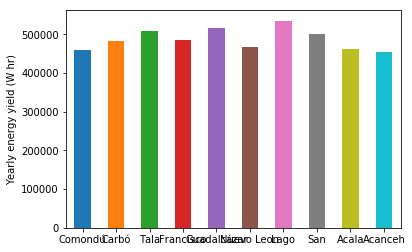

In [31]:
energies.plot(kind='bar', rot=0)
plt.ylabel('Yearly energy yield (W hr)')

In [56]:
# sLCOE = {(overnight capital cost * capital recovery factor + fixed O&M cost)/(8760 * capacity factor)} 
# + (fuel cost * heat rate) + variable O&M cost.

# CRF = {i(1 + i)^n} / {[(1 + i)^n]-1}


def slcoe_calculator_renewable(occ, i, n, fom, cf, fc, hr, vom):
    """
    occ = Overnight capital cost ($/kW)
    i = Interest/Discount rate (percentage)
    n = Lifetime/Number of years
    crf = Capital Recovery Factor
    fom = Fixed O&M Cost ($/kW-yr)
    cf = Capacity Factor (percentage)
    fc = Fuel Cost (Btu/kWh)
    hr = Heat Rate ($/MMBtu)
    vom = Variable O&M Cost ($/kWh)
    """
    
    # converting all inputs to cents/kWh and percentages to fractions
    occ = occ * 100
    fom = fom * 100
    vom = vom * 100
    hr = hr * 100 / 1000000
    i = i/100
    cf = cf/100
    crf = i*((1 + i)**n) / ((1 + i)**n - 1)
    
    return (occ * crf + fom)/(8760 * cf) + (fc * hr) + vom

In [58]:
lcoe_calculator_renewable(3540, 3, 20, 25, 43.6, 8, 10000, 0.002)

15.084493865277983

In [8]:
pd.Series(['1', '2', '3']).apply(float) * pd.Series(['1', '2', '3']).apply(float)

0    1.0
1    4.0
2    9.0
dtype: float64